In [74]:
import pandas as pd, numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [75]:
age = []
gender = []
height = []
glucose_level = []
diabetic = []
weight = []
member = []

n_names=2000
for n in range(n_names):
#  Age
    age.append(np.random.choice(np.arange(22,80,3)))
# Gender    
    gender=np.random.choice(['Male','Female'],n_names, p=[.55,.45])
# Hight in cm    
    height_val = [147,150,152,155,157,160,163,165,168,170,173,175,178,180,183,185,188,191,193]
    height.append(np.random.choice(height_val))
#  Weight     
    weight.append(np.random.choice(np.arange(40,105,5)))
        
    physical_cat = ['High','Moderate','Low']
#     physical_cat = [2,1,0]
    physical = np.random.choice(physical_cat,n_names,p=['.11','.49','.40'])
    
    life_style_smoker =["No",'Yes']
    life_style = np.random.choice(life_style_smoker,n_names,p=['.88','.12'])
    
#     member_diabetic = ['Father','Mother','Sister','Brother','None','Mother;Father','Father;Mother;Sister','Mother;Sister',
#                       'Mother;Brother','Father;Sister','Father;Brother','Father;Mother;Brother','Father;Mother;Sister;Brother']
#     member_diabetic = np.random.choice(member_diabetic,n_names,p=['.30','.15','.03','.04','.38','.025','0.005','0.005',
#                                                                         '.005','.01','0.02','0.01','0.02'])

    
    member = np.random.choice(['No','Yes'],n_names,p=[.60,.40])
    
    blood_cat = ['Normal','Elevated','High','Very High','Extremely High']
    blood_cat_claim = np.random.choice(blood_cat,n_names,p=['.60','.11','.15','.10','.04'])
    
#     blood_cat = [0,1,2,3,4]
    blood_pressure = np.random.choice(blood_cat,n_names,p=['.60','.11','.15','.10','.04'])
    
    glucose_level.append(np.random.choice(np.arange(70,310,5)))
    
    
    
variables=[age,gender,height,weight,
           physical,life_style,member,blood_pressure,glucose_level]

df_diabetes=pd.DataFrame(variables).transpose()
df_diabetes.columns=["Age","Gender","Height (centimeters)","Weight (Kg)","Physical Activities",
                     "Life Style (Smoking)","Member Diabetic","Blood Pressure","Glucose Level (Random mg/dl)"]
    
    
df_diabetes['BMI'] = df_diabetes.apply(lambda x: round(x["Weight (Kg)"]/(math.pow(x['Height (centimeters)']/100,2)),1),axis=1)
def convert_to_int(x):
    return int(x)

df_diabetes['Age'] = df_diabetes['Age'].apply(lambda x:convert_to_int(x))
df_diabetes['Height (centimeters)'] = df_diabetes['Height (centimeters)'].apply(lambda x:convert_to_int(x))
df_diabetes['Weight (Kg)'] = df_diabetes['Weight (Kg)'].apply(lambda x:convert_to_int(x))
# df_diabetes['Blood Pressure'] = df_diabetes['Blood Pressure'].apply(lambda x:convert_to_int(x))
df_diabetes['Glucose Level (Random mg/dl)'] = df_diabetes['Glucose Level (Random mg/dl)'].apply(lambda x:convert_to_int(x))

In [76]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2000 non-null   int64  
 1   Gender                        2000 non-null   object 
 2   Height (centimeters)          2000 non-null   int64  
 3   Weight (Kg)                   2000 non-null   int64  
 4   Physical Activities           2000 non-null   object 
 5   Life Style (Smoking)          2000 non-null   object 
 6   Member Diabetic               2000 non-null   object 
 7   Blood Pressure                2000 non-null   object 
 8   Glucose Level (Random mg/dl)  2000 non-null   int64  
 9   BMI                           2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 117.2+ KB


In [77]:
def diabetic_logic(x):
    calculation = 0
    alert = 0
    info = 0
    success = 0
    if x['Glucose Level (Random mg/dl)'] < 140:
        success = 1
    elif x['Glucose Level (Random mg/dl)'] >=140 and  x['Glucose Level (Random mg/dl)'] < 199:
        info = 1
        calculation+=25
    else:
        alert = 1
        calculation+=50
        
#     matching_meb = set(x['Member Diabetic'].split(";")) & set(['Mother','Father','Sister','Brother'])
#     if len(matching_meb) > 0:
#         for i in matching_meb:
#             if i.lower() == "Father".lower():
#                 calculation+=7.5
#             if i.lower() == "Mother".lower():
#                 calculation+=10
#             if i.lower() == "Brother".lower():
#                 calculation+=3.75
#             if i.lower() == "Sister".lower():
#                 calculation+=3.75

    if x['Member Diabetic']:
        calculation+=25
        
        
        
    if x['Blood Pressure'].lower() == 'High'.lower():
        calculation+=3
    elif x['Blood Pressure'].lower() == 'Very High'.lower():
        calculation+=4
    elif x['Blood Pressure'].lower() == 'Extremely High'.lower():
        calculation+=5
        
#     if x['Blood Pressure'] == 2:
#         calculation+=3
#     elif x['Blood Pressure'] == 3: 
#         calculation+=4
#     elif x['Blood Pressure'] == 4:
#         calculation+=5    
    

    if x['BMI'] >=25.0 and x['BMI'] <=29.9:
        # Overweight
        calculation+=4
    elif x['BMI'] >= 30.0:
#         Obesity
        calculation+=5 
        
    if x['Physical Activities'] == "No":
        calculation+=5
        
    if x['Life Style (Smoking)'] == "Yes":
        calculation+=5
    
    if x['Age'] > 40 and x['Age'] < 60:
        calculation+=4
    elif x['Age'] > 60:
        calculation+=5
        
#     if alert == 1 :
#         return 1, calculation
#     elif alert == 0 :
#         return 0, calculation

#     if calculation >= 60 :
#         return 1, calculation
#     elif calculation < 60 :
#         return 0, calculation


    if success:
        return "Non-Diabetic", calculation
    if info:
        if calculation >= 38 and calculation <= 61:
            return "Pre-Diabetic", calculation
        if calculation < 38:
            return "Non-Diabetic", calculation
        if calculation > 61:
            return "Diabetic", calculation
    if alert:
        if calculation <= 61:
            return "Pre-Diabetic", calculation
        else:
            return "Diabetic",calculation

#     if alert:
#         if calculation > 60:
#             return 1, calculation
#         else:
#             return 0,calculation
#     else:
#         return 0, calculation
    

In [78]:
df_diabetes['Diagnose'],df_diabetes['Severity']= zip(*df_diabetes.apply(lambda x: diabetic_logic(x), axis=1))
df_diabetes.drop(['Severity'],axis=1,inplace=True)

In [79]:
df_diabetes.head(4)

,Age,Gender,Height (centimeters),Weight (Kg),Physical Activities,Life Style (Smoking),Member Diabetic,Blood Pressure,Glucose Level (Random mg/dl),BMI,Diagnose
0,43,Female,183,70,Moderate,No,No,Normal,180,20.9,Pre-Diabetic
1,40,Female,183,40,Moderate,Yes,No,Normal,115,11.9,Non-Diabetic
2,25,Female,155,70,Low,No,Yes,Normal,210,29.1,Diabetic
3,46,Male,165,85,Moderate,No,No,Normal,305,31.2,Diabetic


## Handling Categorical Data using Label Encoding and OneHotEncoding Techniques

In [80]:
# retrieve the array of data
diabetes = df_diabetes.copy()

#handling ordinal data 
activity_map = {'Low': 0,'Moderate': 1,'High': 2}
diabetes['Physical Activities'] = diabetes['Physical Activities'].map(activity_map)
blood_pres_map= {'Normal':0,'Elevated':1,'High':2,'Very High':3,'Extremely High':4}
diabetes['Blood Pressure'] = diabetes['Blood Pressure'].map(blood_pres_map)

status_map = {'Non-Diabetic':0,'Pre-Diabetic':1,'Diabetic':2}
diabetes['Diagnose'] = diabetes['Diagnose'].map(status_map)

# Anther possible option may be labelEncoding which expect only one-dim arguments
# lab_enc = LabelEncoder()
# diabetes['Diagnose'] = lab_enc.fit_transform(diabetes['Diagnose'].values)


# Nominal Encoding using oneHotEncoding
ohe = OneHotEncoder(categories='auto', drop='first')
nominal_cat = ['Gender','Life Style (Smoking)','Member Diabetic']
from sklearn.compose import ColumnTransformer
data = diabetes[nominal_cat].values
c_transf = ColumnTransformer([ ('onehot', ohe, [0,1,2]) ])
diabetes[nominal_cat] = c_transf.fit_transform(data).astype(int)

diabetes.head(4)

,Age,Gender,Height (centimeters),Weight (Kg),Physical Activities,Life Style (Smoking),Member Diabetic,Blood Pressure,Glucose Level (Random mg/dl),BMI,Diagnose
0,43,0,183,70,1,0,0,0,180,20.9,1
1,40,0,183,40,1,1,0,0,115,11.9,0
2,25,0,155,70,0,0,1,0,210,29.1,2
3,46,1,165,85,1,0,0,0,305,31.2,2


### Normalizing, Scaling Technique 

<AxesSubplot:>

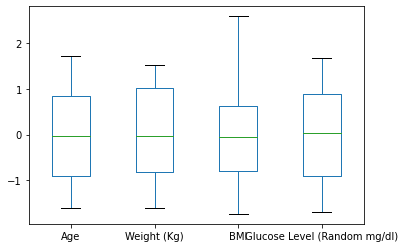

In [81]:
# Now lets apply both approches together and see the difference we get from both i.e. Normalization and Scaling 

# Now when to use Normalization and Scaling is difficult to answer
# --------
# Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution.
# This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural
# Networks.

# Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. 
# However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a
# bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

X = diabetes.iloc[:,:-1]
y= diabetes.Diagnose


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=27)

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

diabetic_norm_df = pd.DataFrame(X_train_norm, columns=list(X_train.columns))
diabetic_norm_df.describe()


# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()


# numerical features
num_cols = ['Age','Weight (Kg)','Height (centimeters)','Glucose Level (Random mg/dl)','BMI']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])



X_train_stand[['Age','Weight (Kg)','BMI','Glucose Level (Random mg/dl)']].plot(kind='box')
# diabetic_norm_df.plot(kind='box')

In [82]:
# diabetic_norm_df[['Age','Weight (Kg)','BMI','Glucose Level (Random mg/dl)']].plot(kind='box')

In [86]:
# training an SVR model
from  sklearn.svm import SVR
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# SVR
svr = SVR(kernel='rbf',C=5)

rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    svr.fit(trainX[i],y_train)
    # predict
    pred = svr.predict(testX[i])
    # RMSE
    
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_svr = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_svr

,RMSE
Original,0.277417
Normalized,0.329550
Standardized,0.292024


## Applying Machine Learning

In [116]:
# SVR

# Placeholder for all Machine Learning Algorithms

classifiers = []

model1 = svm.SVC()
classifiers.append(model1)
model2 = tree.DecisionTreeClassifier()
classifiers.append(model2)
model3 = RandomForestClassifier()
classifiers.append(model3)
model4 = GaussianNB() 
classifiers.append(model4)
BNBclf = BernoulliNB()
classifiers.append(BNBclf)
# model = LogisticRegression()
# classifiers.append(model)
 
print("Without Taking the help of feature scaling")

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, round(acc,3)))
    cm = confusion_matrix(y_test, y_pred)
print("\n")
print("Taking the help of feature normalization")


for clf in classifiers:
    clf.fit(X_train_norm, y_train)
    y_pred= clf.predict(X_test_norm)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, round(acc,3)))
    cm = confusion_matrix(y_test, y_pred)
print("\n")
print("Taking the help of feature standardization")


for clf in classifiers:
    clf.fit(X_train_stand, y_train)
    y_pred= clf.predict(X_test_stand)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, round(acc,3)))
    cm = confusion_matrix(y_test, y_pred)

# I can conclude that feature scaling doesn't play any signification role in improving the accuracy of our models

Without Taking the help of feature scaling
Accuracy of SVC() is 0.95
Accuracy of DecisionTreeClassifier() is 0.992
Accuracy of RandomForestClassifier() is 0.992
Accuracy of GaussianNB() is 0.944
Accuracy of BernoulliNB() is 0.495


Taking the help of feature normalization
Accuracy of SVC() is 0.935
Accuracy of DecisionTreeClassifier() is 0.992
Accuracy of RandomForestClassifier() is 0.994
Accuracy of GaussianNB() is 0.944
Accuracy of BernoulliNB() is 0.511


Taking the help of feature standardization
Accuracy of SVC() is 0.935
Accuracy of DecisionTreeClassifier() is 0.992
Accuracy of RandomForestClassifier() is 0.995
Accuracy of GaussianNB() is 0.944
Accuracy of BernoulliNB() is 0.753


In [110]:
# split the dataset into train and test sets
# diabetes_df = diabetes.values
# X = diabetes_df[:,:-1]
# y= diabetes_df[:,-1]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
classifiers = []




model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
from sklearn.naive_bayes import GaussianNB 
model1 = GaussianNB() 
classifiers.append(model1)
from sklearn.svm import SVC
model5 = SVC(kernel='rbf', random_state = 1)
classifiers.append(model5)
from sklearn.naive_bayes import BernoulliNB
BNBclf = BernoulliNB()
classifiers.append(BNBclf)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classifiers.append(model)
 

print("Using xtrain")
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is \n %s"%(clf, cm))
    
print("------------------Using xtrainnorm-----------------")
    
for clf in classifiers:
    clf.fit(X_train_norm, y_train)
    y_pred= clf.predict(X_test_norm)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is \n %s"%(clf, cm))
    
print("===================Using xtrainstand==================")

for clf in classifiers:
    clf.fit(X_train_stand, y_train)
    y_pred= clf.predict(X_test_stand)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is \n %s"%(clf, cm))

Using xtrain
Accuracy of SVC() is 0.95
Confusion Matrix of SVC() is 
 [[198   0   0]
 [  0 120  15]
 [  1  17 309]]
Accuracy of DecisionTreeClassifier() is 0.9939393939393939
Confusion Matrix of DecisionTreeClassifier() is 
 [[198   0   0]
 [  0 133   2]
 [  0   2 325]]
Accuracy of RandomForestClassifier() is 0.9939393939393939
Confusion Matrix of RandomForestClassifier() is 
 [[198   0   0]
 [  0 134   1]
 [  0   3 324]]
Accuracy of GaussianNB() is 0.943939393939394
Confusion Matrix of GaussianNB() is 
 [[195   3   0]
 [  3 117  15]
 [  2  14 311]]
Accuracy of SVC(random_state=1) is 0.95
Confusion Matrix of SVC(random_state=1) is 
 [[198   0   0]
 [  0 120  15]
 [  1  17 309]]
Accuracy of BernoulliNB() is 0.4954545454545455
Confusion Matrix of BernoulliNB() is 
 [[  0   0 198]
 [  0   0 135]
 [  0   0 327]]


c:\users\muhammad usama\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LogisticRegression() is 0.9272727272727272
Confusion Matrix of LogisticRegression() is 
 [[192   6   0]
 [  2 114  19]
 [  0  21 306]]
------------------Using xtrainnorm-----------------
Accuracy of SVC() is 0.9348484848484848
Confusion Matrix of SVC() is 
 [[190   8   0]
 [  2 115  18]
 [  3  12 312]]
Accuracy of DecisionTreeClassifier() is 0.9924242424242424
Confusion Matrix of DecisionTreeClassifier() is 
 [[198   0   0]
 [  0 133   2]
 [  0   3 324]]
Accuracy of RandomForestClassifier() is 0.9939393939393939
Confusion Matrix of RandomForestClassifier() is 
 [[198   0   0]
 [  0 134   1]
 [  0   3 324]]
Accuracy of GaussianNB() is 0.943939393939394
Confusion Matrix of GaussianNB() is 
 [[195   3   0]
 [  3 117  15]
 [  2  14 311]]
Accuracy of SVC(random_state=1) is 0.9348484848484848
Confusion Matrix of SVC(random_state=1) is 
 [[190   8   0]
 [  2 115  18]
 [  3  12 312]]
Accuracy of BernoulliNB() is 0.5106060606060606
Confusion Matrix of BernoulliNB() is 
 [[ 10   0 18

In [18]:
y_train

1981    2
39      1
1719    0
16      1
941     2
       ..
1848    0
543     1
1864    0
1720    2
1043    0
Name: Diagnose, Length: 1340, dtype: int32

In [60]:
Scalling ??
How we map new data for prediction ??
Feature Selection ??

,Age,Gender,Height (centimeters),Weight (Kg),Physical Activities,Life Style (Smoking),Member Diabetic,Blood Pressure,Glucose Level (Random mg/dl),BMI,Diagnose
0,31,Male,165,80,High,No,No,Normal,245,29.4,Diabetic
1,52,Female,160,40,Low,No,No,Normal,155,15.6,Pre-Diabetic
2,73,Male,180,75,Moderate,No,Yes,Elevated,230,23.1,Diabetic
3,76,Female,160,100,Low,No,Yes,Normal,245,39.1,Diabetic
4,58,Female,155,80,Moderate,No,Yes,Normal,185,33.3,Pre-Diabetic


<AxesSubplot:>

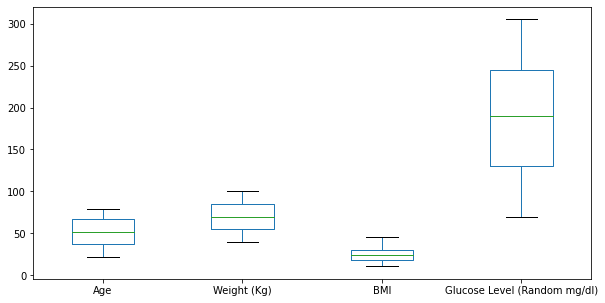

In [104]:

diabetes[['Age','Weight (Kg)','BMI','Glucose Level (Random mg/dl)']].plot(kind='box',figsize=(10,5))